In [1]:
# Run this first so it's ready by the time you need it
install.packages("readr")
install.packages("dplyr")
install.packages("supernova")
install.packages("ggformula")
library(readr)
library(dplyr)
library(supernova)
library(ggformula)
GSS <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/GSS.csv")

#smaller dataset, more similar in size to most psychology studies
set.seed(10)
GSS_subset <- GSS_subset <- sample_n(GSS, 100)


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:supernova’:

    number


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Rows: 2348 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): number_of_children, age_of_respondent, college_major_1, college_ma...


# Chapter 18 - Model Testing & Comparison

## 18.1 Significant effects

In the previous chapter we learned how to use the sampling distribution of &beta; to test the null hypothesis. Using permutation testing, we generated a sampling distribution for a world in which &beta; = 0 is true in the data generation process. We used the sampling distribution to calculate the p-value, the probability that the sample b, or a b more extreme than the sample, would have occurred just by chance if the null hypothesis were true. Based on the p-value, and the decision criterion we had set (i.e., &alpha; of .05), we decided whether to reject the null hypothesis or not.

Decisions of statistical significance are made about one statistical estimate at a time. Thus, it is a common tool for psychologists who are interested in questions such as "is *this* effect a real part of the data generation process?" Let's explore in more concrete detail how to use them to answer psychological research questions. 

### Effects in the simple model
Returning back to the General Social Survey dataset we encountered earlier, one hypothesis we had was whether parents' education level explains some of the variation in a person's own education level. A research question like this implies that we are interested in the predictor "parents' education" specifically, and its unique contribution to predictions about own education. We recognize that there are likely many factors that lead to how much schooling someone goes through, and we may even know some more of them and be able to model them as well. But our interests focus on how important parents' education level is specifically in the data generation process. Is it a meaningful contributor to explaining variation in own education? Or is there not really an effect? 

Using the framework of Null Hypothesis Statistical Testing, we can answer this sort of question. We just have to put the question into terms that make sense in the NHST. 

First, we need to pick the variables we're using to test this question. We'll use the outcome variable ```highest_year_of_school_completed``` from the GSS, and we'll use specifically the mother's education level to predict it - ```highest_year_school_completed_mother```. 

Second, we need to formulate the null hypothesis. We think that mother's education is interesting if it predicts some variation in a participant's education - that there is a relationship between the two. That implies that there would be a non-zero coefficient for mother's education in a linear model. It would *not* be an interesting variable if there was no change in predicted participant education when mother's education varied - i.e., if the coefficient were 0. Thus, we define the null hypothesis to be: 

$$H_0: b_1 = 0$$

Where b<sub>1</sub> is the coefficient for mother's education in the linear model. In a world where the true population parameter &beta;<sub>1</sub> is 0, where there is no real effect of mother's education, we wouldn't be so interested in it as a predictor. So we want to test how likely it is that b<sub>1</sub> in our sample came from a world where &beta;<sub>1</sub> is 0, or if we want to reject that explanation. 

In step 3, we now need to fit a model in it. We need to specify the equation of that model so we know what we're testing: 

$$\hat{Y} = b_0 + b_1X_i$$

And then we will fit that equation with ```lm()``` as we have done many times before:

In [2]:
model_obj <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother , data = GSS_subset)

From this model, we can extract our estimate of b<sub>1</sub>:

In [3]:
model_obj$coefficients[[2]]

[1] 0.3154907

Fourthly, we determine the probability of getting a b<sub>1</sub> like this, were the null hypothesis true - if &beta;<sub>1</sub> truly equals 0. Use ```summary()``` to find this p-value for the b<sub>1</sub> coefficient: 

In [4]:
#Use summary() to see the p-value of the effect of mother's education



Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother, 
    data = GSS_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3114 -2.0973 -0.0438  1.9027  5.6886 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          10.31143    0.81259  12.690  < 2e-16 ***
highest_year_school_completed_mother  0.31549    0.06418   4.916 4.32e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.363 on 84 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.2234,	Adjusted R-squared:  0.2142 
F-statistic: 24.17 on 1 and 84 DF,  p-value: 4.32e-06


And as our final step, we look at that p-value and decide whether or not it is significant - whether or not we should reject the hypothetical world of &beta;<sub>1</sub> = 0. As psychologists we are likely using an &alpha; criterion of 0.05, so we will check if the p-value for b<sub>1</sub> is < 0.05.

We can look in the output of ```summary()```, or we can directly output it with the ```$``` operator:

In [8]:
summary(model_obj)$coefficients[2,4]

[1] 4.31981e-06

The code above uses the ```summary()``` output as an object itself, digs into the Coefficients table, and ouputs the number on the second row, fourth column. As we saw in the ```summary()``` output, that would be the number for ```Pr(>|t|)``` on the row for ```highest_year_school_completed_mother```. 

Is this value < 0.05?

In [9]:
summary(model_obj)$coefficients[2,4] < 0.05

[1] TRUE

It is. Thus, we reject the null hypothesis that there is no effect of mother's education. 

Further, if we find the 95% confidence interval for b<sub>1</sub>:

In [10]:
#Use confint() to find 95% CI of highest_year_school_completed_mother estimate


,2.5 %,97.5 %
highest_year_school_completed_mother,0.187871,0.4431103


We see that the interval includes only positive values. Thus we reject the null hypothesis that there is no effect of mother's education, AND we say the likely range of true &beta;<sub>1</sub>s is a positive number. As mother's education increases, the change in participant's education is likely to increase as well. 

Congrats, you have tested a hypothesis and come up with a conclusion! You can now write up your study and send it for peer review! In APA style, we would write this result as:

"There is a significant effect of mother's education (*b* = 0.315, *p* <0.001, 95% CI [0.188, 0.443])."

Just remember that the conclusions we can make about this research question are limited, when we use null hypothesis testing. From last chapter, the limits of p-values are:

- 1) The risk of Type I and Type II error is everpresent
- 2) You can only reject the null hypothesis, or fail to reject the null hypothesis (not confirm the null hypothesis)
- 3) You can only decide if a sample estimate is significantly different from 0 or not; there are no levels of significance
- 4) A p-value is the probability of these data given the null hypothesis, NOT the probability of the null hypothesis given these data. 
- 5) P-values are tied to sample sizes, so it is possible to get a significant p-value with an impractically-tiny effect. 

In the context of this analysis, that means: 

- 1) We can't be *sure* that &beta;<sub>1</sub> doesn't equal 0 - we're only very confident.
- 2) If our p-value had been > 0.05, we couldn't say that we're sure &beta;<sub>1</sub> equals 0, because we can't confirm the null hypothesis - only reject it or fail to reject it. 
- 3) If our p-value had been 0.06, that would still be an insignificant effect. We set our &alpha; decision criterion to be 0.05, and we need to stick to that. 
- 4) Our p-value is the probability that we would get this b<sub>1</sub> estimate if &beta;<sub>1</sub> = 0; it is NOT the probability that &beta;<sub>1</sub> = 0 if we get this b<sub>1</sub> estimate. Those statements are different conditional probabilities and thus different numbers (and a Frequentist would say you can't get a probability of &beta;<sub>1</sub> anyways). 
- 5) Our p-value is tied to our sample size N=100. If we had more or less data, we might have made a different decision. 

### Effects in the multivariable model
As we saw in chapter 13, mother's and father's education levels are correlated. Thus if we're interested specifically in the effect of mother's education, we may want to *control for* father's education, to be sure that mother's education is a significant, unique effect in its own right or if it's only related to participant's education by virtue of being related to father's education. 

To do this, first we pick our variables. We'll use ```highest_year_of_school_completed``` and ```highest_year_school_completed_mother``` as before, as well as ```highest_year_school_completed_father``` as another predictor. 

Second, specify the null hypothesis. Here we're still interested in the effect of mother's education in particular. We're just using father's education as a control. So the null hypothesis is still: 

$$H_0: b_1 = 0$$

Third, specify and fit the model:

$$\hat{Y} = b_0 + b_1X_{1i} + b_2X_{2i}$$


In [11]:
model_obj <- lm(highest_year_of_school_completed ~ 
                highest_year_school_completed_mother + 
                highest_year_school_completed_father, data = GSS_subset)

Fourth, find the p-value of b<sub>1</sub>:

In [12]:
summary(model_obj)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father, data = GSS_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6085 -1.5057 -0.3986  1.6772  5.1415 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           9.60849    0.99629   9.644 5.05e-14 ***
highest_year_school_completed_mother  0.08480    0.10156   0.835  0.40693    
highest_year_school_completed_father  0.29020    0.09913   2.928  0.00475 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.249 on 63 degrees of freedom
  (34 observations deleted due to missingness)
Multiple R-squared:  0.2857,	Adjusted R-squared:  0.263 
F-statistic:  12.6 on 2 and 63 DF,  p-value: 2.494e-05


And finally, make a decision about whether or not mother's education is significant. 

Because mother's and father's education are related, there is shared variation between them - both of them explain some of the same variation in participant's education. We need to put them both in a model together in order to disentangle what amount of *unique* variation they each explain. By doing this, we see that the effect of mother's education got much smaller, after taking father's education into account - the coefficient fell from 0.315 to 0.08. This effect is so small, that it is no longer significant - the p-value is 0.407, which is above our &alpha; cutoff of 0.05. We'd interpret this to mean that a world where there is *no* unique effect of mother's education (&beta;<sub>1</sub> = 0), and b<sub>1</sub> estimate of 0.08 would be a likely outcome. We can further see this by checking the 95% confidence interval:

In [13]:
confint(model_obj, "highest_year_school_completed_mother", level=0.95)

,2.5 %,97.5 %
highest_year_school_completed_mother,-0.1181635,0.2877553


This range includes 0 as one of the &beta;<sub>1</sub>s that are likely to produce b<sub>1</sub> = 0.08. Thus, with the data we have, we fail to reject the null hypothesis that there is no effect of mother's education. We'd report this result as: 

"The effect of mother's education was insignificant when controlling for father's education (*b* = 0.085, *p* = 0.407, 95% CI [-0.118, 0.288])."

Note again that this does not mean &beta;<sub>1</sub> is definitely 0. There are still many non-zero values in the confidence interval that could be the truth. It could be that we only failed to find a significant effect because ```GSS_subset``` only had a sample size of N=100. If we ran this model in the full GSS data instead: 

In [14]:
large_model_obj <- lm(highest_year_of_school_completed ~ 
                highest_year_school_completed_mother + 
                highest_year_school_completed_father, data = GSS)
summary(large_model_obj)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father, data = GSS)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2505  -2.0154  -0.1461   1.7495   8.6329 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          10.04168    0.22797  44.049  < 2e-16 ***
highest_year_school_completed_mother  0.15598    0.02412   6.466 1.34e-10 ***
highest_year_school_completed_father  0.19475    0.02202   8.845  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.632 on 1558 degrees of freedom
  (787 observations deleted due to missingness)
Multiple R-squared:  0.1953,	Adjusted R-squared:  0.1943 
F-statistic: 189.1 on 2 and 1558 DF,  p-value: < 2.2e-16


We *would* find a significant effect of mother's education. It's easier to distinguish small effects from &beta;<sub>1</sub> = 0 with more data. But in that case, it's always worthwhile to ask yourself if an effect that is significant, but with a very small coefficient, is worth anything to you in practical terms. Statistically significant doesn't mean *important*, only unlikely to be 0. 

### Effects in interaction models

When we test for interaction effects, we are often most interested in the interaction term. We want to know if the effect of one variable depends on values of the other (a non-zero interaction coefficient), or if the effects of each variable operate on the outcome variable independent of each other (a zero interaction coefficient). Thus, when we have hypotheses about interactions, we usually assess the significance of the interaction term. 

Let's test the hypothesis that there is an interaction between mother's and father's education on participant's education level. Our variables will be the same as in the multivariable case, ```highest_year_of_school_completed```, ```highest_year_school_completed_mother```, and ```highest_year_school_completed_father```. Since we already know the effect of mother's education is likely small, we'll run this analysis in the full set of GSS data.

Our null hypothesis is now for the interaction effect, and not the main effect of mother's education:

$$H_0: b_3 = 0$$

Specifying and fitting our model, we get: 

$$\hat{Y} = b_0 + b_1X_{1i} + b_2X_{2i} + b_3X_{1i}*X_{2i}$$


In [17]:
model_obj <- lm(highest_year_of_school_completed ~ 
                highest_year_school_completed_mother + 
                highest_year_school_completed_father +
                highest_year_school_completed_mother*highest_year_school_completed_father, 
                data = GSS)

summary(model_obj)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father + highest_year_school_completed_mother * 
    highest_year_school_completed_father, data = GSS)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2623  -1.9741  -0.1414   1.7377   8.6588 

Coefficients:
                                                                           Estimate
(Intercept)                                                                9.940341
highest_year_school_completed_mother                                       0.166788
highest_year_school_completed_father                                       0.206748
highest_year_school_completed_mother:highest_year_school_completed_father -0.001114
                                                                          Std. Error
(Intercept)                                                                 0.363843
highest_year_school_completed_mother                       

This output is kind of hard to read because of the long variable names, so let's just focus on the Coefficients table:

In [18]:
summary(model_obj)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.940341148,0.363843376,27.3203851,1.385083e-134
highest_year_school_completed_mother,0.166788026,0.038676579,4.3123780,1.716522e-05
highest_year_school_completed_father,0.206747882,0.040152309,5.1490907,2.951022e-07
highest_year_school_completed_mother:highest_year_school_completed_father,-0.001114319,0.003117477,-0.3574427,7.208089e-01


Our hypothesis is about the interaction effect b<sub>3</sub>, so investigate the estimate and p-value on that line. We see that the p-value of the interaction is p = 0.721, which is not below the &alphal criterion of 0.05. Thus we fail to reject the null hypothesis that there is no interaction. We can't be *sure* that there is no interaction truly in the population, but we are pretty confident that the true interaction effect is something quite close to zero:

In [19]:
confint(model_obj, "highest_year_school_completed_mother:highest_year_school_completed_father",
       level = 0.95)

,2.5 %,97.5 %
highest_year_school_completed_mother:highest_year_school_completed_father,-0.007229214,0.005000576


Without a significant interaction, we would interpret the relationship between parents' education and participant education just as main effects. We'd report this as:

"There was no significant interaction between the effects of mother's and father's education on participant's education (*b* = -0.001, *p* = 0.721, 95% CI [-0.007, 0.005]). Instead there was a significant main effect of mother's education (*b* = 0.167, *p* < 0.001, 95% CI [0.091, 0.243]) and a significant main effect of father's education (*b* = 0.207, *p* < 0.001, 95% CI [0.128, 0.286])."

## 18.2 Significant models

The examples above illustrate how to use null hypothesis testing when you have research questions about particular predictors in a model. But that's not the only type of research question you might have. Perhaps instead of one particular variable, you're interested in whether a set of multiple variables together are helpful for making predictions about an outcome. In other words, you want to know if your entire *model* is significant, not just any one predictor. 

As it turns out, the sampling distribution of &beta; is just one of many sampling distributions we could construct. Using the same approach we developed for one model coefficient, we could make a sampling distribution of any statistic that we can calculate. That includes estimates of whole model error such as PRE.

At this point, we're going to switch over to using a different name for PRE that is used more commonly - R<sup>2</sup>. "PRE" is the name used in the ```supernova()``` package we relied on for learning about error in models, but the concept of what proportion of error a model explains is more commonly discussed and written about as R<sup>2</sup>.

Using ```summary()``` on a model object, we can skip the ANOVA table entirely and find this value:

In [22]:
model_obj <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother +
                highest_year_school_completed_father, data = GSS_subset)
summary(model_obj)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father, data = GSS_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6085 -1.5057 -0.3986  1.6772  5.1415 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           9.60849    0.99629   9.644 5.05e-14 ***
highest_year_school_completed_mother  0.08480    0.10156   0.835  0.40693    
highest_year_school_completed_father  0.29020    0.09913   2.928  0.00475 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.249 on 63 degrees of freedom
  (34 observations deleted due to missingness)
Multiple R-squared:  0.2857,	Adjusted R-squared:  0.263 
F-statistic:  12.6 on 2 and 63 DF,  p-value: 2.494e-05


On the second to the last line of this output is an entry called "Multiple R-squared: 0.2857". This stands for the R<sup>2</sup> value in a regression model. It is also possible to get this value directly by saving the ```summary()``` output to its own object, and then finding the ```$r.squared``` property of the summary object. 

In [24]:
model_summary <- summary(model_obj)
model_summary$r.squared

[1] 0.2857142

We can easily verify that this is the same value as PRE is in the ANOVA table for the full model:

In [23]:
supernova(model_obj)

Refitting to remove 34 cases with missing value(s)
ℹ lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + highest_year_school_completed_father, data = listwise_delete(GSS_subset, c("highest_year_of_school_completed", "highest_year_school_completed_mother", "highest_year_school_completed_father")))



 Analysis of Variance Table (Type III SS)
 Model: highest_year_of_school_completed ~ highest_year_school_completed_mother + highest_year_school_completed_father

                                                             SS df     MS
 ------------------------------------ --------------- | ------- -- ------
                                Model (error reduced) | 127.463  2 63.732
 highest_year_school_completed_mother                 |   3.526  1  3.526
 highest_year_school_completed_father                 |  43.351  1 43.351
                                Error (from model)    | 318.658 63  5.058
 ------------------------------------ --------------- | ------- -- ------
                                Total (empty model)   | 446.121 65  6.863
      F    PRE     p
 ------ ------ -----
 12.600 0.2857 .0000
  0.697 0.0109 .4069
  8.571 0.1198 .0047
                    
 ------ ------ -----
                    

When assessing statistical models as a whole, rather than individual predictors, the statistic we care about is PRE/R<sup>2</sup>. We don't care so much how strong any one effect is, but together we want a model that explains at least some proportion of the variation in an outcome variable. In a world where this model is not helpful, it wouldn't explain any variance - the population R<sup>2</sup> value would be 0. Thus, for significance testing entire models, we need to examine the null sampling distribution of R<sup>2</sup> = 0. 

## 18.3 Null sampling distribution of R<sup>2</sup>

In order to construct a null sampling distribution of R<sup>2</sup>, we first need to understand what would cause a model to have R<sup>2</sup> = 0. The R<sup>2</sup> model reflects the proportion of variation in an outcome variable that a full model explains, relative to the empty model. This score can range from 0 to 1. With R<sup>2</sup> = 1, there would be no error left in a model; the set of explanatory variables the model uses results in perfect predictions about the outcome values.

The opposite, then, is when R<sup>2</sup> = 0. This would mean the full model explains no additional variation relative to the empty model. It performs exactly how the empty model would for making predictions. What would turn a full model into an empty model?

Recall the equation for the empty model: 

$$ \hat{Y}_i = b_0 $$

The only parameter in the model is b<sub>0</sub>. For a full multivariable model with two predictors, the equation would look like so: 

$$ \hat{Y}_i = b_0 + b_1X_{1i} + b_2X_{2i} $$

In order to make this match the equation of the empty model, we need to cancel out the extra terms. The situation that would create this is if both b<sub>1</sub> and b<sub>2</sub> were 0. 

$$ \hat{Y}_i = b_0 + (0)X_{1i} + (0)X_{2i} =$$

$$ \hat{Y}_i = b_0 $$

The null hypothesis for a full model is thus larger than any one parameter. It is the hypothesis that *all* predictor coefficients are equal to 0: 

$$H_0: \beta_1 = \beta_2 = 0 $$

To create the null sampling distribution of one coefficient, last chapter we used permutation testing to shuffle the order of one predictor variable. That broke the relationship between the predictor and the outcome, making the true value of that predictor's coefficient equal to 0. We can use permutation testing for our full model situation as well. Since our null hypothesis is that all predictor coefficients = 0, we simply shuffle every predictor and fit a model with those shuffled predictors. Then we estimate the R<sup>2</sup> value of the permutation test model. Saving this value and repeating many times will let us build a null sampling distribution of R<sup>2</sup>.

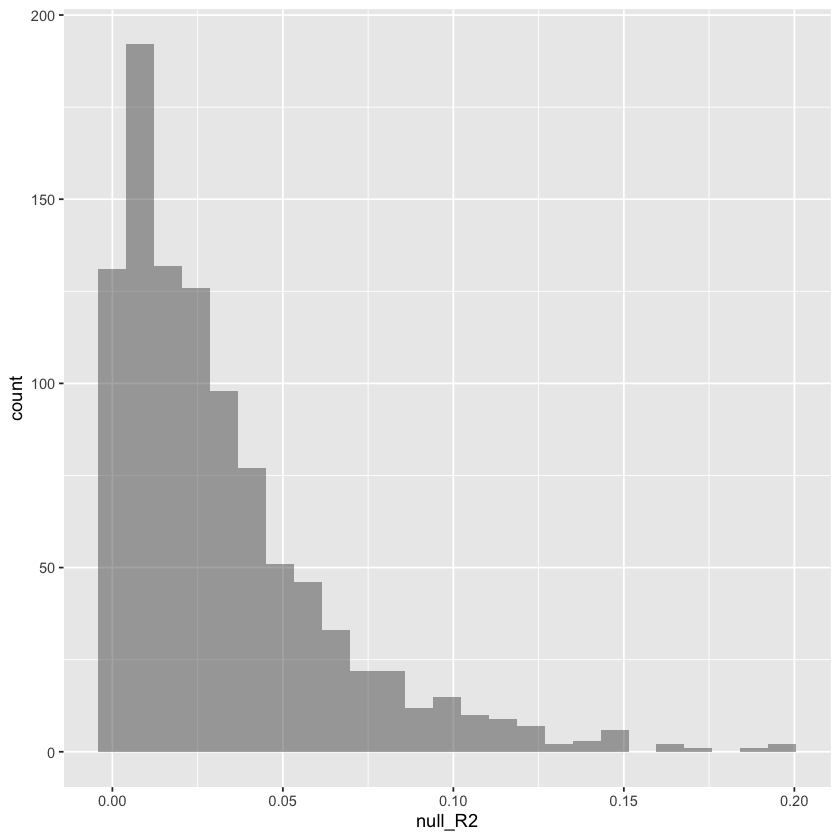

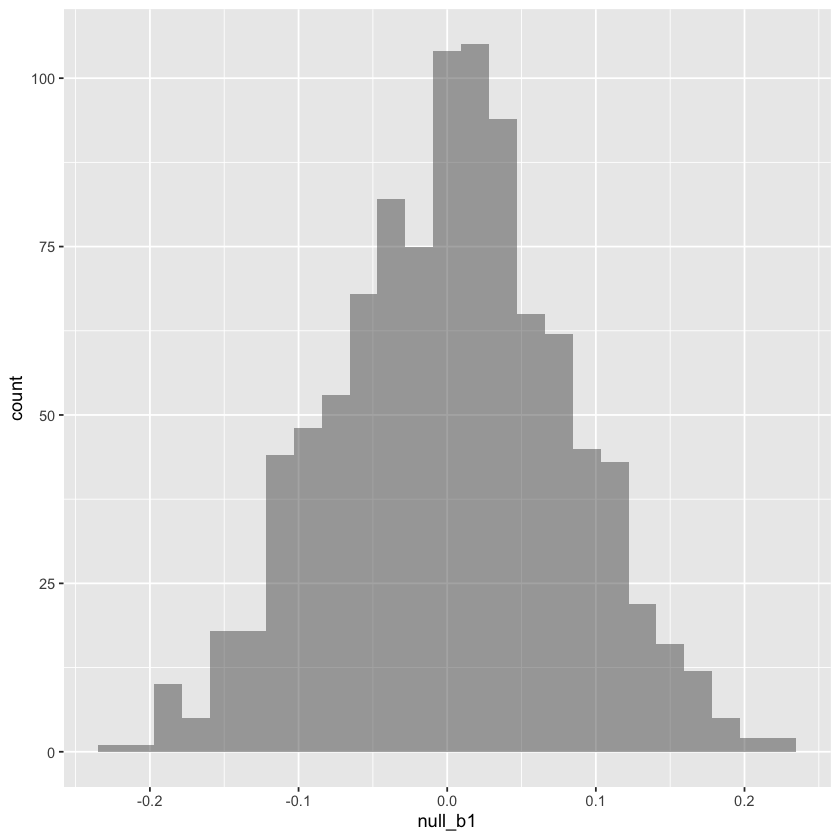

In [26]:
#creating an empty vector of 1000 spots
null_R2 <- vector(length=1000)

#generate 1000 unique samples, saving each R2
for (i in 1:1000) {
    GSS_subset$shuffled_mother <- sample(x=GSS_subset$highest_year_school_completed_mother, 
                                         size=length(GSS_subset$highest_year_school_completed_mother), 
                                         replace=FALSE)
    GSS_subset$shuffled_father <- sample(x=GSS_subset$highest_year_school_completed_father, 
                                         size=length(GSS_subset$highest_year_school_completed_father), 
                                         replace=FALSE)
    model <- lm(highest_year_of_school_completed ~ shuffled_mother + shuffled_father, data=GSS_subset)
    null_R2[i] <- summary(model)$r.squared
}

R2_df <- data.frame(null_R2)
gf_histogram( ~ null_R2, data=R2_df)

Walk yourself through every line of this permutation test code, and make sure you understand what it's doing and why. We're shuffling both of the predictors of mother's and father's education, using those shuffled predictors to predict the participants' education level, saving the model R<sup>2</sup>, and repeating that process 1,000 times. 

Then, investigate the shape of the R<sup>2</sup> null sampling distribution. Interestingly, it has a very different shape than the sampling distribution of &beta;. In the figure below we put two example sampling distributions side by side for purposes of comparison.

<img src="images/ch18-R2b1.png" width="750">

The sampling distribution of &beta; has two tails because the effect of a predictor could be positive or could be negative. But R<sup>2</sup> is different: the full model can explain none of the error compared to the empty model (0), or up to all of the error from the empty model (1). But it cannot explain less than 0 error. Because R<sup>2</sup> is a proportion, it has a clear lower bound of 0, and a clear upper bound of 1.

Assuming the null hypothesis is true, the only place an extreme R<sup>2</sup> could fall is in the upper tail of the distribution, which is why there is only one tail. An extreme positive effect of parental education *or* an extreme negative effect of parental education are both the same to R<sup>2</sup>: both would make a predictive model, and fall in the upper tail of the sampling distribution of R<sup>2</sup>.

## 18.4 Significance testing a model

Once we have the null sampling distribution of R<sup>2</sup>, we can compare our estimate of R<sup>2</sup> to it. In this comparison, we ask ourselves - if R<sup>2</sup> = 0 in the population, is it likely or unlikely to get an estimate of R<sup>2</sup> such as ours? 

In the null distribution of &beta;, we considered something "unlikely" if it was outside the area where 95% of b estimates would fall. In other words, an unlikely b estimate is one that is at least 1.96 standard errors above or below &beta; = 0. 

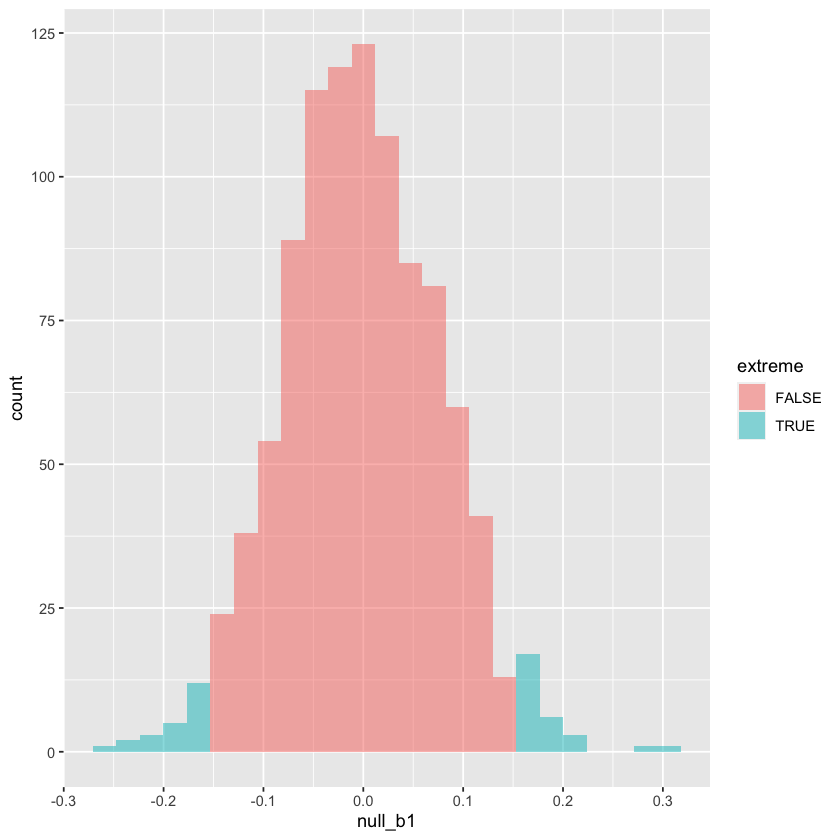

In [28]:
#creating an empty vector of 1000 spots
null_b1 <- vector(length=1000)

#generate 1000 unique samples, saving each b1
for (i in 1:1000) {
    GSS_subset$shuffled_mother <- sample(x=GSS_subset$highest_year_school_completed_mother, 
                                         size=length(GSS_subset$highest_year_school_completed_mother), 
                                         replace=FALSE)
    model <- lm(highest_year_of_school_completed ~ shuffled_mother, data=GSS_subset)
    null_b1[i] <- model$coefficients[[2]]
}

b1_df <- data.frame(null_b1)

#cut-off values for extremeness
b1s_sd <- sd(b1_df$null_b1)
high_cutoff <- sd(b1_df$null_b1)*1.96
low_cutoff <- sd(b1_df$null_b1)*-1.96

#marking something as extreme if it is greater than 1.96*sd or less than -1.96*sd
b1_df$extreme <- b1_df$null_b1 > high_cutoff | b1_df$null_b1 < low_cutoff

gf_histogram(~ null_b1, data = b1_df, fill = ~extreme)

There are two "zones" of unlikeliness in this distribution, because a b estimate can either be greater than 0 or less than 0. 2.5% of the distribution is in each tail, adding up to the 5% of bs that count as unlikely. To check whether a particular estimate of b is unlikely (and thus significantly different from 0), we'd ask if it's larger than the 97.5%ile OR less than the 2.5%ile of the distribution.

In [32]:
simple_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother, data=GSS_subset)
b1 <- simple_model$coefficients[[2]]

quantile(null_b1, 0.025)
quantile(null_b1, 0.975)
b1
b1 > quantile(null_b1, 0.975) | b1 < quantile(null_b1, 0.025)

2.5% 
-0.1489152

97.5% 
0.1578148

[1] 0.3154907

97.5% 
 TRUE

In the sampling distribution of R<sup>2</sup>, an estimate can only be larger than 0, never less. There is one tail to the distribution. This means that if we were to use the same &alpha; criterion for significance as before, &alpha; = 0.05, the 5% unlikely estimates will all be in the high tail. Based on this fact, a significant R<sup>2</sup> is one that is larger than the 95%ile of the null sampling distribution.

In [33]:
full_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother +
                highest_year_school_completed_father, data = GSS_subset)
R2 <- summary(full_model)$r.squared

quantile(null_R2, 0.95)
R2 
R2 > quantile(null_R2, 0.95)

95% 
0.0986257

[1] 0.2857142

95% 
TRUE

To calculate the p-value for a model's R<sup>2</sup> score, we'd count the proportion of the null sampling distribution that is at least as large as our model estimate. 

In [34]:
more_positive <- null_R2 > R2
num_more_positive <- sum(more_positive)

num_more_positive / length(null_R2)

[1] 0

According to this, we didn't simulate any R<sup>2</sup>s from the null distribution that were larger than the R<sup>2</sup> we estimated from the dataset. It's p-value is something less than 1 in a thousand: p < 0.001. 

## 18.4 The F distribution

The shape of this sort of one-tailed distribution is called an **F distribution**. Much in the same way original statisticians had to build a mathematical formula to represent the theoretical shape of a coefficient's sampling distribution (the t distribution), they also built one for model performance.  

<img src="images/ch18-fdist.png" width="600">

The shape of an F distribution is controlled by two values: the number of parameters in a model (k) and the degrees of freedom of a model (N-k). k sets where the peak of the distribution is horizontally, while the ratio of k to df sets what proportion of the area is in the major peak versus the tail.

The width of the null sampling distribution for a b estimate is directly proportional to the sample size N, such that smaller N's lead to wider distributions. This is because the estimates from smaller sample sizes are less stable, so larger estimates are considered more likely. The same principle applies in the null sampling distribution of R<sup>2</sup>, but it's not just the sample size that determines this. It's the degrees of freedom, N-k. A model could be fit in a large dataset, but if a large number of parameters are also fit, the R<sup>2</sup> estimate will be less stable than a model fit with just a couple of parameters. This is because, with many parameters, there are a lot more ways the set of bs can vary! With more ways bs can vary, a wider range of R<sup>2</sup>s are likely.

With permutation testing, 

## 18.6 Significance testing a general linear model

Coursekata 10.5

## 18.7 Comparing different full models

Coursekata 10.7

## 18.8 Multiple comparisons problem

Coursekata 10.8

